## Final Model: Random Forest
Chosen for highest recall score on validation set. Next steps:
1. Explore RF feature importances for better insight into features associated with fire risk
2. Partial dependence plots for better insights into features and target variability
3. Tune RF precision and recall decision threshold 

In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import plot_partial_dependence
from helper_functions import *
from pipeline import *

In [2]:
X = pipeline('../data/stratified_train.csv', drop_cat=False)
y = X.pop('Target')
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [4]:
f = open('tuned-rf.pkl', 'rb')
rf = pickle.load(f)

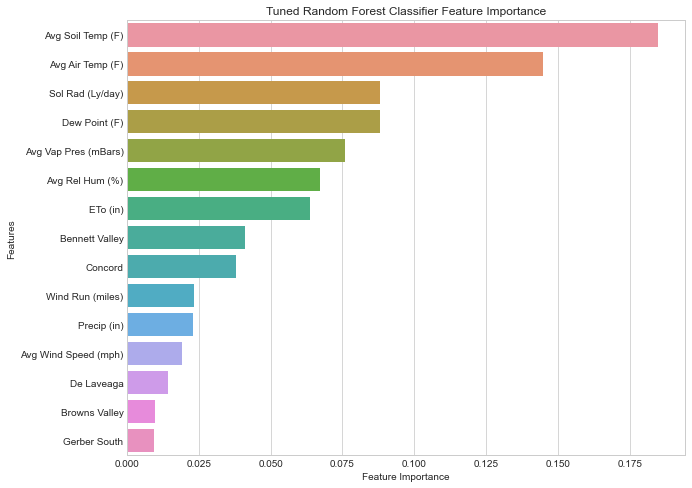

In [5]:
plot_feature_importance(best_rf.feature_importances_, X_train.columns, "Tuned Random Forest Classifier")

In [ ]:
from sklearn.metrics import precision_recall_curve

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label="Precision")
    plt.plot(thresholds, recall[:-1], 'g--', label='Recall')